<h1>Relatório: Aprendizado de máquina e reconhecimento de padrões</h1>
<h3>Aluno: André de Sousa Araújo</h3>
<p>Objetivo principal é estimar a ocorrências de precipações extremas.</p>
<p>Espaço: Região HOUSTON - Texas</p>
<p><b>Base escolhida:</b>
This public dataset was created by the National Oceanic and Atmospheric Administration (NOAA) and includes global data obtained from the USAF Climatology Center.  This dataset covers GSOD data between 1929 and present, collected from over 9000 stations.
</p>
<p>Dataset Source: NOAA</p>

<p>Category: Weather</p>

<p>Use: This dataset is publicly available for anyone to use under the following terms provided by the Dataset Source — http://www.data.gov/privacy-policy#data_policy — and is provided "AS IS" without any warranty, express or implied, from Google. Google disclaims all liability for any damages, direct or indirect, resulting from the use of the dataset.</p>

<p>Update Frequency: daily</p>

<h2 style="color:blue;">Importando o dataset e explorando os dados</h2>

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import shutil

<h2 style="color:blue;">Importando o dataset para treinamento e validação</h2>

<p>Vamos selecionar para treinamento e validação os meses de agosto de 1985 até 2015 desta região.</p>

In [3]:
df = pd.read_csv('../data/prcp-data-2015.csv')
print len(df)
df[522:530]

255618


,d_prcp,d_stn,ws_lat,ws_lon,d_da,d_mo,d_year,d_temp,d_dewp,d_slp,...,d_min,d_flag_prcp,d_sndp,d_fog,d_rain_drizzle,d_snow_ice_pellets,d_hail,d_thunder,d_tornado_funnel_cloud,key
522,0.00,700001,60.785,-148.839,26,6,2015,54.9,48.7,1010.5,...,48.9,G,999.9,0,1,0,0,0,0,522
523,0.00,700001,60.785,-148.839,27,8,2015,52.4,46.5,1008.1,...,46.9,G,999.9,0,1,0,0,0,0,523
524,0.10,700001,60.785,-148.839,27,7,2015,52.4,48.5,1005.3,...,46.0,G,999.9,0,1,0,0,0,0,524
525,0.75,700001,60.785,-148.839,27,6,2015,53.4,48.4,1013.8,...,48.9,G,999.9,0,1,0,0,0,0,525
526,0.00,700001,60.785,-148.839,28,8,2015,53.2,29.8,1005.0,...,46.9,G,999.9,0,0,0,0,0,0,526
527,0.03,700001,60.785,-148.839,28,7,2015,55.7,49.3,1008.5,...,46.0,G,999.9,0,1,0,0,0,0,527
528,3.03,700001,60.785,-148.839,28,6,2015,52.2,47.8,1013.7,...,50.0,G,999.9,0,1,0,0,0,0,528
529,0.00,700001,60.785,-148.839,29,8,2015,47.6,33.4,998.8,...,37.0,G,999.9,0,0,0,0,0,0,529


In [4]:
df = df[(df['ws_lat'] >= 25)]
df = df[(df['ws_lat'] <= 48)]
df = df[(df['ws_lon'] <= -65)]
df = df[(df['ws_lon'] >= -124)]
print len(df)
df[:10]

222545


,d_prcp,d_stn,ws_lat,ws_lon,d_da,d_mo,d_year,d_temp,d_dewp,d_slp,...,d_min,d_flag_prcp,d_sndp,d_fog,d_rain_drizzle,d_snow_ice_pellets,d_hail,d_thunder,d_tornado_funnel_cloud,key
169,0.0,690150,34.3,-116.167,1,7,2015,86.2,60.3,1010.8,...,78.1,H,999.9,0,1,0,0,1,0,169
170,0.0,690150,34.3,-116.167,1,8,2015,89.8,51.8,1012.2,...,72.0,I,999.9,0,0,0,0,0,0,170
171,0.0,690150,34.3,-116.167,1,6,2015,83.6,29.6,1009.6,...,66.0,I,999.9,0,0,0,0,0,0,171
172,0.0,690150,34.3,-116.167,2,7,2015,85.7,61.1,1012.3,...,72.0,I,999.9,0,0,0,0,0,0,172
173,0.0,690150,34.3,-116.167,2,8,2015,90.5,46.7,1010.1,...,75.9,I,999.9,0,0,0,0,0,0,173
174,0.0,690150,34.3,-116.167,2,6,2015,79.1,28.7,1010.9,...,64.0,I,999.9,0,0,0,0,0,0,174
175,0.0,690150,34.3,-116.167,3,6,2015,78.7,32.8,1008.4,...,64.0,I,999.9,0,0,0,0,0,0,175
176,0.0,690150,34.3,-116.167,3,8,2015,91.3,41.2,1008.7,...,77.0,I,999.9,0,0,0,0,0,0,176
177,0.0,690150,34.3,-116.167,3,7,2015,91.4,51.4,1010.1,...,72.0,I,999.9,0,0,0,0,0,0,177
178,0.0,690150,34.3,-116.167,4,8,2015,89.1,30.3,1009.9,...,73.0,I,999.9,0,0,0,0,0,0,178


<h3 style="color:red;">Verificando a distribuição do conjunto de treinamento e validação</h3>

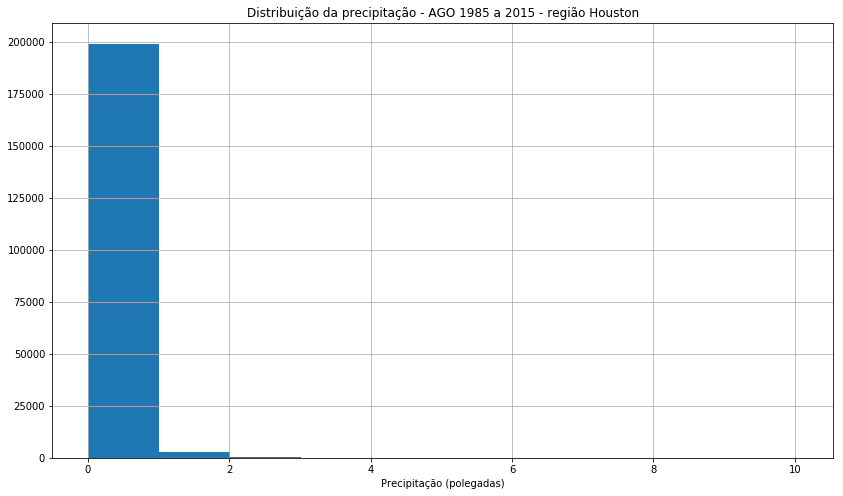

In [5]:
import matplotlib.pyplot as plt  
%matplotlib inline
plt.rcParams['figure.figsize'] = [14, 8]  
prcp30_limpo = df[df['d_prcp']< 99.99]
prcp30_limpo.d_prcp.hist()  
plt.title(u'Distribuição da precipitação - AGO 1985 a 2015 - região Houston')  
plt.xlabel(u'Precipitação (polegadas)')  
plt.show()  

<h3 style="color:red;">Limiar para classificar a precipitação como extrema do conjunto de treinamento e validação</h3>

In [6]:
import numpy as np
p = np.percentile(prcp30_limpo['d_prcp'], 99) # return 99%th percentile
print p

1.34


<p>Considerando os últimos 30 anos o limiar é 1.65 polegadas. Comparando com 2016 é limiar mais baixo, 2016 teve um agosto bem mais chuvoso e com mais eventos extremos que a média dos últimos anos</p>

<h3 style="color:red;">Medindo a quantidade de chuvas extremas no período</h3>

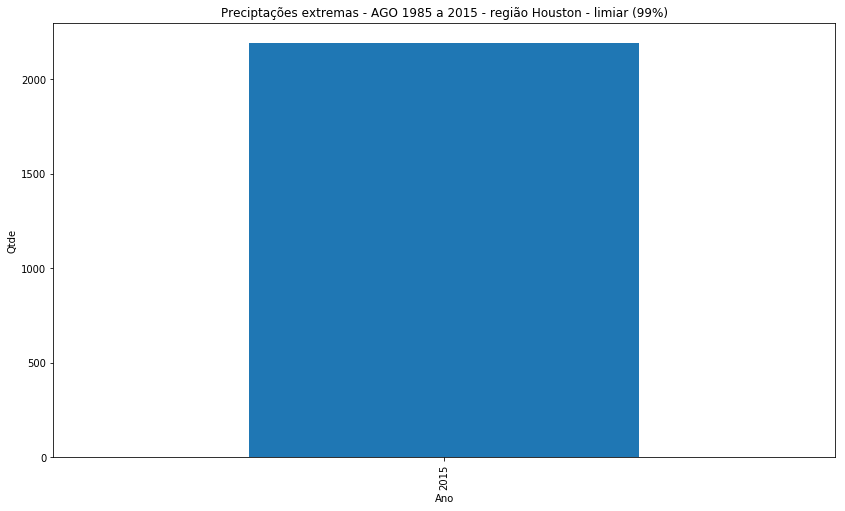

In [7]:
extreme = prcp30_limpo[prcp30_limpo['d_prcp']> 1.3] 
r = extreme.groupby(['d_year'])['d_prcp'].count()
r.plot.bar()
plt.title(u'Preciptações extremas - AGO 1985 a 2015 - região Houston - limiar (99%)')  
plt.ylabel(u'Qtde')  
plt.xlabel(u'Ano')  
plt.show()

<h2 style="color:blue;">Feature engineering</h2>

<p>O objetivo é realizar a previsão destes eventos usando as variáveis de 3 dias atrás. No estudo de Dolif Neto e Nobre (2012) foram extraídas variavéis também de 3 dias atrás dos fenômenos precipitações extremas. Assim vamos derivar as variáveis de 3 dias atrás antes do fenômeno. Inicialente <b>vamos derivar somente a precipitação</b>, testar e depois fazer para todas as varíaveis</p>

In [8]:
prcp30_limpo = prcp30_limpo.apply(pd.to_numeric, errors='coerce')  

tmp = prcp30_limpo[['d_stn','d_da','d_mo','d_year','d_prcp']]
tmp = tmp.sort_values(['d_year','d_stn','d_da'])
tmp = tmp.reset_index(drop=True)

In [9]:
N = 1 #1 dia antes
feature = 'd_prcp'

nth_prior =[]

# Devirando a variavel para uma lista representando a enesima valor da variavel, se for o primeiro dia não terá dia anterior.
for y in range(2015,2016):
  df_year = tmp[tmp['d_year']== y]
  df_year = df_year.reset_index(drop=True)
  rows = df_year.shape[0]
  prior= [None]*N + [df_year[feature][i-N] for i in range(N, rows)]
  nth_prior = nth_prior + prior
  
col_name = "{}_{}".format(feature, N)  
tmp[col_name] = nth_prior  
tmp[:10]   

,d_stn,d_da,d_mo,d_year,d_prcp,d_prcp_1
0,690150,1,7,2015,0.0,NaN
1,690150,1,8,2015,0.0,0.0
2,690150,1,6,2015,0.0,0.0
3,690150,2,7,2015,0.0,0.0
4,690150,2,8,2015,0.0,0.0
5,690150,2,6,2015,0.0,0.0
6,690150,3,6,2015,0.0,0.0
7,690150,3,8,2015,0.0,0.0
8,690150,3,7,2015,0.0,0.0
9,690150,4,8,2015,0.0,0.0


<p>Veja que para a estação ID 722430 no dia 4/8/1985, a precipitação do dia anterior (d_prcp_1) é exatamente o valor medido no dia 03/08/1985. Agora vamos fazer isto para todas as variaveis.</p>

In [10]:
def derivar_valor_anterior(df, dias, variavel):
  N = dias
  feature = variavel
  tmp = df

  nth_prior =[]

  # Devirando a variavel para uma lista representando a enesima valor da variavel, se for o primeiro dia não terá dia anterior.
  for y in range(2015,2016):
    df_year = tmp[tmp['d_year']== y]
    df_year = df_year.reset_index(drop=True)
    rows = df_year.shape[0]
    prior= [None]*N + [df_year[feature][i-N] for i in range(N, rows)]
    nth_prior = nth_prior + prior

  col_name = "{}_{}".format(feature, N)  
  tmp[col_name] = nth_prior


df_dev = df.apply(pd.to_numeric, errors='coerce')  
df_dev = df_dev.sort_values(['d_year','d_stn','d_da'])
df_dev = df_dev.reset_index(drop=True)
  
for var in list(df_dev):
  if var not in ['d_stn','d_da','d_mo','d_year','ws_lat','ws_lon']:
    for N in range(1, 4):
      derivar_valor_anterior(df_dev,N,var)

df_dev.columns 

Index([u'd_prcp', u'd_stn', u'ws_lat', u'ws_lon', u'd_da', u'd_mo', u'd_year',
       u'd_temp', u'd_dewp', u'd_slp', u'd_stp', u'd_visib', u'd_wdsp',
       u'd_mxpsd', u'd_gust', u'd_max', u'd_min', u'd_flag_prcp', u'd_sndp',
       u'd_fog', u'd_rain_drizzle', u'd_snow_ice_pellets', u'd_hail',
       u'd_thunder', u'd_tornado_funnel_cloud', u'key', u'd_prcp_1',
       u'd_prcp_2', u'd_prcp_3', u'd_temp_1', u'd_temp_2', u'd_temp_3',
       u'd_dewp_1', u'd_dewp_2', u'd_dewp_3', u'd_slp_1', u'd_slp_2',
       u'd_slp_3', u'd_stp_1', u'd_stp_2', u'd_stp_3', u'd_visib_1',
       u'd_visib_2', u'd_visib_3', u'd_wdsp_1', u'd_wdsp_2', u'd_wdsp_3',
       u'd_mxpsd_1', u'd_mxpsd_2', u'd_mxpsd_3', u'd_gust_1', u'd_gust_2',
       u'd_gust_3', u'd_max_1', u'd_max_2', u'd_max_3', u'd_min_1', u'd_min_2',
       u'd_min_3', u'd_flag_prcp_1', u'd_flag_prcp_2', u'd_flag_prcp_3',
       u'd_sndp_1', u'd_sndp_2', u'd_sndp_3', u'd_fog_1', u'd_fog_2',
       u'd_fog_3', u'd_rain_drizzle_1', u'd_rain_d

<p>Pronto! Agora temos variaveis respectivas de 1, 2, 3 dias atrás. Exemplo: d_prcp_1, d_prcp_2, d_prcp_3 referentes a precipitação 1, 2 e 3 dias atrás respectivamente.</p>

<h2 style="color:blue;">Limpeza dos dados</h2>

<p>Conforme dito anteriormente, existem muitos dados ausentes para algumas variáveis. Podemos excluir as instâncias, mas precisamos ver se perderíamos muitos dados</p>

In [11]:
df_dev = df_dev.apply(pd.to_numeric, errors='coerce')  
df_dev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222545 entries, 0 to 222544
Data columns (total 86 columns):
d_prcp                      222545 non-null float64
d_stn                       222545 non-null int64
ws_lat                      222545 non-null float64
ws_lon                      222545 non-null float64
d_da                        222545 non-null int64
d_mo                        222545 non-null int64
d_year                      222545 non-null int64
d_temp                      222545 non-null float64
d_dewp                      222545 non-null float64
d_slp                       222545 non-null float64
d_stp                       222545 non-null float64
d_visib                     222545 non-null float64
d_wdsp                      222545 non-null float64
d_mxpsd                     222545 non-null float64
d_gust                      222545 non-null float64
d_max                       222545 non-null float64
d_min                       222545 non-null float64
d_flag_prcp  

In [12]:
df_dev[:10]

,d_prcp,d_stn,ws_lat,ws_lon,d_da,d_mo,d_year,d_temp,d_dewp,d_slp,...,d_hail_3,d_thunder_1,d_thunder_2,d_thunder_3,d_tornado_funnel_cloud_1,d_tornado_funnel_cloud_2,d_tornado_funnel_cloud_3,key_1,key_2,key_3
0,0.0,690150,34.3,-116.167,1,7,2015,86.2,60.3,1010.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,690150,34.3,-116.167,1,8,2015,89.8,51.8,1012.2,...,NaN,1.0,NaN,NaN,0.0,NaN,NaN,169.0,NaN,NaN
2,0.0,690150,34.3,-116.167,1,6,2015,83.6,29.6,1009.6,...,NaN,0.0,1.0,NaN,0.0,0.0,NaN,170.0,169.0,NaN
3,0.0,690150,34.3,-116.167,2,7,2015,85.7,61.1,1012.3,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,171.0,170.0,169.0
4,0.0,690150,34.3,-116.167,2,8,2015,90.5,46.7,1010.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,172.0,171.0,170.0
5,0.0,690150,34.3,-116.167,2,6,2015,79.1,28.7,1010.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,173.0,172.0,171.0
6,0.0,690150,34.3,-116.167,3,6,2015,78.7,32.8,1008.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,174.0,173.0,172.0
7,0.0,690150,34.3,-116.167,3,8,2015,91.3,41.2,1008.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,175.0,174.0,173.0
8,0.0,690150,34.3,-116.167,3,7,2015,91.4,51.4,1010.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,176.0,175.0,174.0
9,0.0,690150,34.3,-116.167,4,8,2015,89.1,30.3,1009.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,177.0,176.0,175.0


In [13]:
df_temp = df_dev[(df_dev < 9999.9000).all(axis=1)]
print ('Tamanho antes da limpeza: %s' %str(len(df_dev))) 
print ('Tamanho depois da limpeza: %s' %str(len(df_temp))) 

Tamanho antes da limpeza: 222545
Tamanho depois da limpeza: 0


<p>A conclusão é que todo registro tem algum dado ausente. Assim vamos verificar se tem alguma variável que apresenta maiores problemas.<p/>

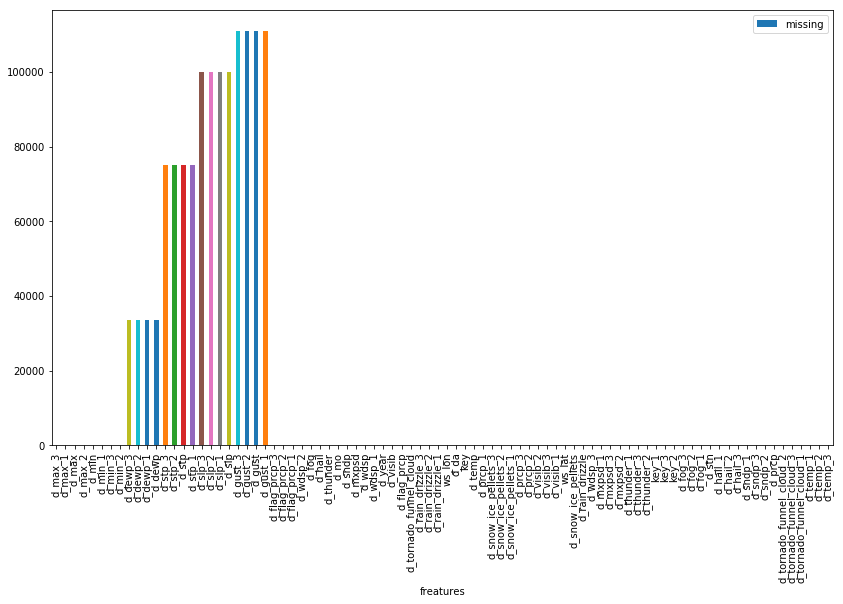

In [14]:
def contabilizar_dados_ausentes(df):
  dn = {}
  
  for v in df.columns:
    df_grp = df[df[v] == 9999.9]
    dn[v] = len(df_grp)

  for v in ['d_gust','d_gust_1', 'd_gust_2', 'd_gust_3']:
    if v in df.columns:
      df_grp = df[df[v] == 999.9]
      dn[v] = dn[v] + len(df_grp)

  for v in ['d_prcp','d_prcp_1', 'd_prcp_2', 'd_prcp_3']:
    if v in df.columns:
      df_grp = df[df[v] == 99.9]
      dn[v] = dn[v] + len(df_grp) 
    
  pdn = pd.DataFrame(dn.items(), columns=['freatures', 'missing'])
  pdn = pdn[pdn > 0]
  pdn = pdn.sort_values(['missing'])
  
  return pdn

pdn = contabilizar_dados_ausentes(df_dev)
pdn.plot.bar(x='freatures', y='missing')
plt.show()

<p> As varíveis velocidade máxima do vento do dia (d_mxpsd), velocidade do fenômeno de aumento repentino do vento (d_gust), média da velocidade do vento (d_wdsp), temperatura do ponto de orvaloho (d_dewp) e pressão atmosferica (d_stp) apresentam valores nulos significativos. Sendo a variável d_gust a mais problemática.</p>

<p>A decisão será remover velocidade do fenômeno de aumento repentino do vento (d_gust) e  pressão atmosferica (d_stp). E interpolar as demais utilizando algum método.</p>

In [15]:
df_limpo = df_dev.copy(deep=True)

for column in df_limpo.columns:
    if column in ['d_gust','d_gust_1','d_gust_2','d_gust_3']:
        df_limpo = df_limpo.drop(column, axis = 1)
        
for column in df_limpo.columns:
    if column in ['d_stp','d_stp_1','d_stp_2','d_stp_3']:
        df_limpo = df_limpo.drop(column, axis = 1)
        
for column in df_limpo.columns:
    if column in ['d_flag_prcp','d_flag_prcp_1','d_flag_prcp_2','d_flag_prcp_3']:
        df_limpo = df_limpo.drop(column, axis = 1)
        
for column in df_limpo.columns:
    if column in ['d_sndp','d_sndp_1','d_sndp_2','d_sndp_3']:
        df_limpo = df_limpo.drop(column, axis = 1)
        
for column in df_limpo.columns:
    if column in ['key','key_1','key_2','key_3']:
        df_limpo = df_limpo.drop(column, axis = 1)

df_limpo.columns

Index([u'd_prcp', u'd_stn', u'ws_lat', u'ws_lon', u'd_da', u'd_mo', u'd_year',
       u'd_temp', u'd_dewp', u'd_slp', u'd_visib', u'd_wdsp', u'd_mxpsd',
       u'd_max', u'd_min', u'd_fog', u'd_rain_drizzle', u'd_snow_ice_pellets',
       u'd_hail', u'd_thunder', u'd_tornado_funnel_cloud', u'd_prcp_1',
       u'd_prcp_2', u'd_prcp_3', u'd_temp_1', u'd_temp_2', u'd_temp_3',
       u'd_dewp_1', u'd_dewp_2', u'd_dewp_3', u'd_slp_1', u'd_slp_2',
       u'd_slp_3', u'd_visib_1', u'd_visib_2', u'd_visib_3', u'd_wdsp_1',
       u'd_wdsp_2', u'd_wdsp_3', u'd_mxpsd_1', u'd_mxpsd_2', u'd_mxpsd_3',
       u'd_max_1', u'd_max_2', u'd_max_3', u'd_min_1', u'd_min_2', u'd_min_3',
       u'd_fog_1', u'd_fog_2', u'd_fog_3', u'd_rain_drizzle_1',
       u'd_rain_drizzle_2', u'd_rain_drizzle_3', u'd_snow_ice_pellets_1',
       u'd_snow_ice_pellets_2', u'd_snow_ice_pellets_3', u'd_hail_1',
       u'd_hail_2', u'd_hail_3', u'd_thunder_1', u'd_thunder_2',
       u'd_thunder_3', u'd_tornado_funnel_cloud_1',
 

<p>Agora temos outras varíaveis para tratar, que ainda estão afetando muitas instâncias</p>

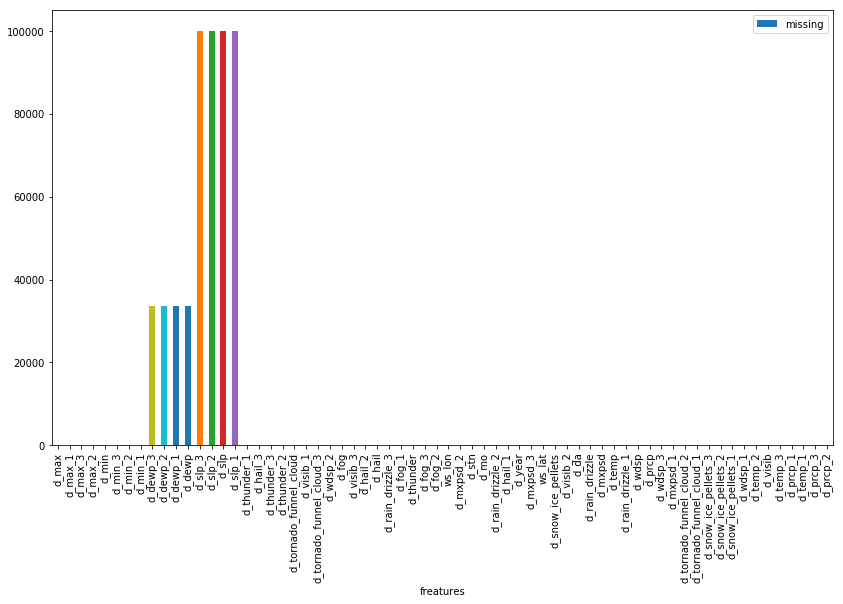

In [16]:
p = contabilizar_dados_ausentes(df_limpo)
p.plot.bar(x='freatures', y='missing')
plt.show()

<p>Primeiramente vamos marcar os dados ausentes.</p>

In [17]:
def marcar_dados_ausentes(df):
  for v in df.columns:
    df[v] = df[v].replace([9999.9],"NaN")
  for v in df.columns:
    df[v] = df[v].replace([999.9],"NaN")

marcar_dados_ausentes(df_limpo)

for v in df_limpo.columns:
  if v in ['d_prcp','d_prcp_1', 'd_prcp_2', 'd_prcp_3']:
    df_limpo[v] = df_limpo[v].replace([99.9],"NaN")

df_limpo = df_limpo.apply(pd.to_numeric, errors='coerce')  
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222545 entries, 0 to 222544
Data columns (total 66 columns):
d_prcp                      222545 non-null float64
d_stn                       222545 non-null int64
ws_lat                      222545 non-null float64
ws_lon                      222545 non-null float64
d_da                        222545 non-null int64
d_mo                        222545 non-null int64
d_year                      222545 non-null int64
d_temp                      222545 non-null float64
d_dewp                      188919 non-null float64
d_slp                       122506 non-null float64
d_visib                     176467 non-null float64
d_wdsp                      210428 non-null float64
d_mxpsd                     207602 non-null float64
d_max                       222495 non-null float64
d_min                       222470 non-null float64
d_fog                       222545 non-null int64
d_rain_drizzle              222545 non-null int64
d_snow_ice_pellet

<p>Interpolá-los</p>

<h2 style="color:blue;">Interpolandos dados para outras variáveis: dados ausentes</h2>

In [18]:
df_intptd = df_limpo.copy(deep=True)
for v in df_intptd:
  if v not in ['d_stn','d_da','d_mo','d_year']:
    df_intptd[v] = df_intptd[v].astype(float)

df_intptd = df_intptd.interpolate(method='linear', axis=0).ffill().bfill()
df_intptd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222545 entries, 0 to 222544
Data columns (total 66 columns):
d_prcp                      222545 non-null float64
d_stn                       222545 non-null int64
ws_lat                      222545 non-null float64
ws_lon                      222545 non-null float64
d_da                        222545 non-null int64
d_mo                        222545 non-null int64
d_year                      222545 non-null int64
d_temp                      222545 non-null float64
d_dewp                      222545 non-null float64
d_slp                       222545 non-null float64
d_visib                     222545 non-null float64
d_wdsp                      222545 non-null float64
d_mxpsd                     222545 non-null float64
d_max                       222545 non-null float64
d_min                       222545 non-null float64
d_fog                       222545 non-null float64
d_rain_drizzle              222545 non-null float64
d_snow_ice_pe

In [19]:
df_intptd[:10]

,d_prcp,d_stn,ws_lat,ws_lon,d_da,d_mo,d_year,d_temp,d_dewp,d_slp,...,d_snow_ice_pellets_3,d_hail_1,d_hail_2,d_hail_3,d_thunder_1,d_thunder_2,d_thunder_3,d_tornado_funnel_cloud_1,d_tornado_funnel_cloud_2,d_tornado_funnel_cloud_3
0,0.0,690150,34.3,-116.167,1,7,2015,86.2,60.3,1010.8,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
1,0.0,690150,34.3,-116.167,1,8,2015,89.8,51.8,1012.2,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
2,0.0,690150,34.3,-116.167,1,6,2015,83.6,29.6,1009.6,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.0,690150,34.3,-116.167,2,7,2015,85.7,61.1,1012.3,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,690150,34.3,-116.167,2,8,2015,90.5,46.7,1010.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,690150,34.3,-116.167,2,6,2015,79.1,28.7,1010.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,690150,34.3,-116.167,3,6,2015,78.7,32.8,1008.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,690150,34.3,-116.167,3,8,2015,91.3,41.2,1008.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,690150,34.3,-116.167,3,7,2015,91.4,51.4,1010.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,690150,34.3,-116.167,4,8,2015,89.1,30.3,1009.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<h2 style="color:blue;">Pearson correlation coefficient</h2>

In [20]:
import seaborn as sns

In [21]:
FLAGS = ['d_fog','d_rain_drizzle','d_snow_ice_pellets','d_hail','d_thunder','d_tornado_funnel_cloud','d_fog_1','d_rain_drizzle_1','d_snow_ice_pellets_1','d_hail_1','d_thunder_1','d_tornado_funnel_cloud_1','d_fog_2','d_rain_drizzle_2','d_snow_ice_pellets_2','d_hail_2','d_thunder_2','d_tornado_funnel_cloud_2','d_fog_3','d_rain_drizzle_3','d_snow_ice_pellets_3','d_hail_3','d_thunder_3','d_tornado_funnel_cloud_3']
print (FLAGS) 

['d_fog', 'd_rain_drizzle', 'd_snow_ice_pellets', 'd_hail', 'd_thunder', 'd_tornado_funnel_cloud', 'd_fog_1', 'd_rain_drizzle_1', 'd_snow_ice_pellets_1', 'd_hail_1', 'd_thunder_1', 'd_tornado_funnel_cloud_1', 'd_fog_2', 'd_rain_drizzle_2', 'd_snow_ice_pellets_2', 'd_hail_2', 'd_thunder_2', 'd_tornado_funnel_cloud_2', 'd_fog_3', 'd_rain_drizzle_3', 'd_snow_ice_pellets_3', 'd_hail_3', 'd_thunder_3', 'd_tornado_funnel_cloud_3']


In [22]:
df_corl = df_intptd.copy(deep=True)
for v in df_corl.columns:
  if v in ['d_stn','d_da','d_mo','d_year', 'ws_lat', 'ws_lon']:
    df_corl = df_corl.drop(v, axis = 1)
    
for v in df_corl.columns:
  if v in FLAGS:
    df_corl = df_corl.drop(v, axis = 1)

df_corl[:10]

,d_prcp,d_temp,d_dewp,d_slp,d_visib,d_wdsp,d_mxpsd,d_max,d_min,d_prcp_1,...,d_wdsp_3,d_mxpsd_1,d_mxpsd_2,d_mxpsd_3,d_max_1,d_max_2,d_max_3,d_min_1,d_min_2,d_min_3
0,0.0,86.2,60.3,1010.8,10.0,7.9,15.0,105.1,78.1,0.0,...,7.9,15.0,15.0,15.0,105.1,105.1,105.1,78.1,78.1,78.1
1,0.0,89.8,51.8,1012.2,9.8,6.3,14.0,102.0,72.0,0.0,...,7.9,15.0,15.0,15.0,105.1,105.1,105.1,78.1,78.1,78.1
2,0.0,83.6,29.6,1009.6,10.0,8.8,19.0,100.0,66.0,0.0,...,7.9,14.0,15.0,15.0,102.0,105.1,105.1,72.0,78.1,78.1
3,0.0,85.7,61.1,1012.3,10.0,4.1,14.0,100.9,72.0,0.0,...,7.9,19.0,14.0,15.0,100.0,102.0,105.1,66.0,72.0,78.1
4,0.0,90.5,46.7,1010.1,10.0,5.5,12.0,104.0,75.9,0.0,...,6.3,14.0,19.0,14.0,100.9,100.0,102.0,72.0,66.0,72.0
5,0.0,79.1,28.7,1010.9,10.0,8.5,19.0,96.1,64.0,0.0,...,8.8,12.0,14.0,19.0,104.0,100.9,100.0,75.9,72.0,66.0
6,0.0,78.7,32.8,1008.4,10.0,7.1,13.0,93.9,64.0,0.0,...,4.1,19.0,12.0,14.0,96.1,104.0,100.9,64.0,75.9,72.0
7,0.0,91.3,41.2,1008.7,10.0,7.1,14.0,104.0,77.0,0.0,...,5.5,13.0,19.0,12.0,93.9,96.1,104.0,64.0,64.0,75.9
8,0.0,91.4,51.4,1010.1,10.0,6.6,14.0,102.0,72.0,0.0,...,8.5,14.0,13.0,19.0,104.0,93.9,96.1,77.0,64.0,64.0
9,0.0,89.1,30.3,1009.9,10.0,6.7,15.0,105.1,73.0,0.0,...,7.1,14.0,14.0,13.0,102.0,104.0,93.9,72.0,77.0,64.0


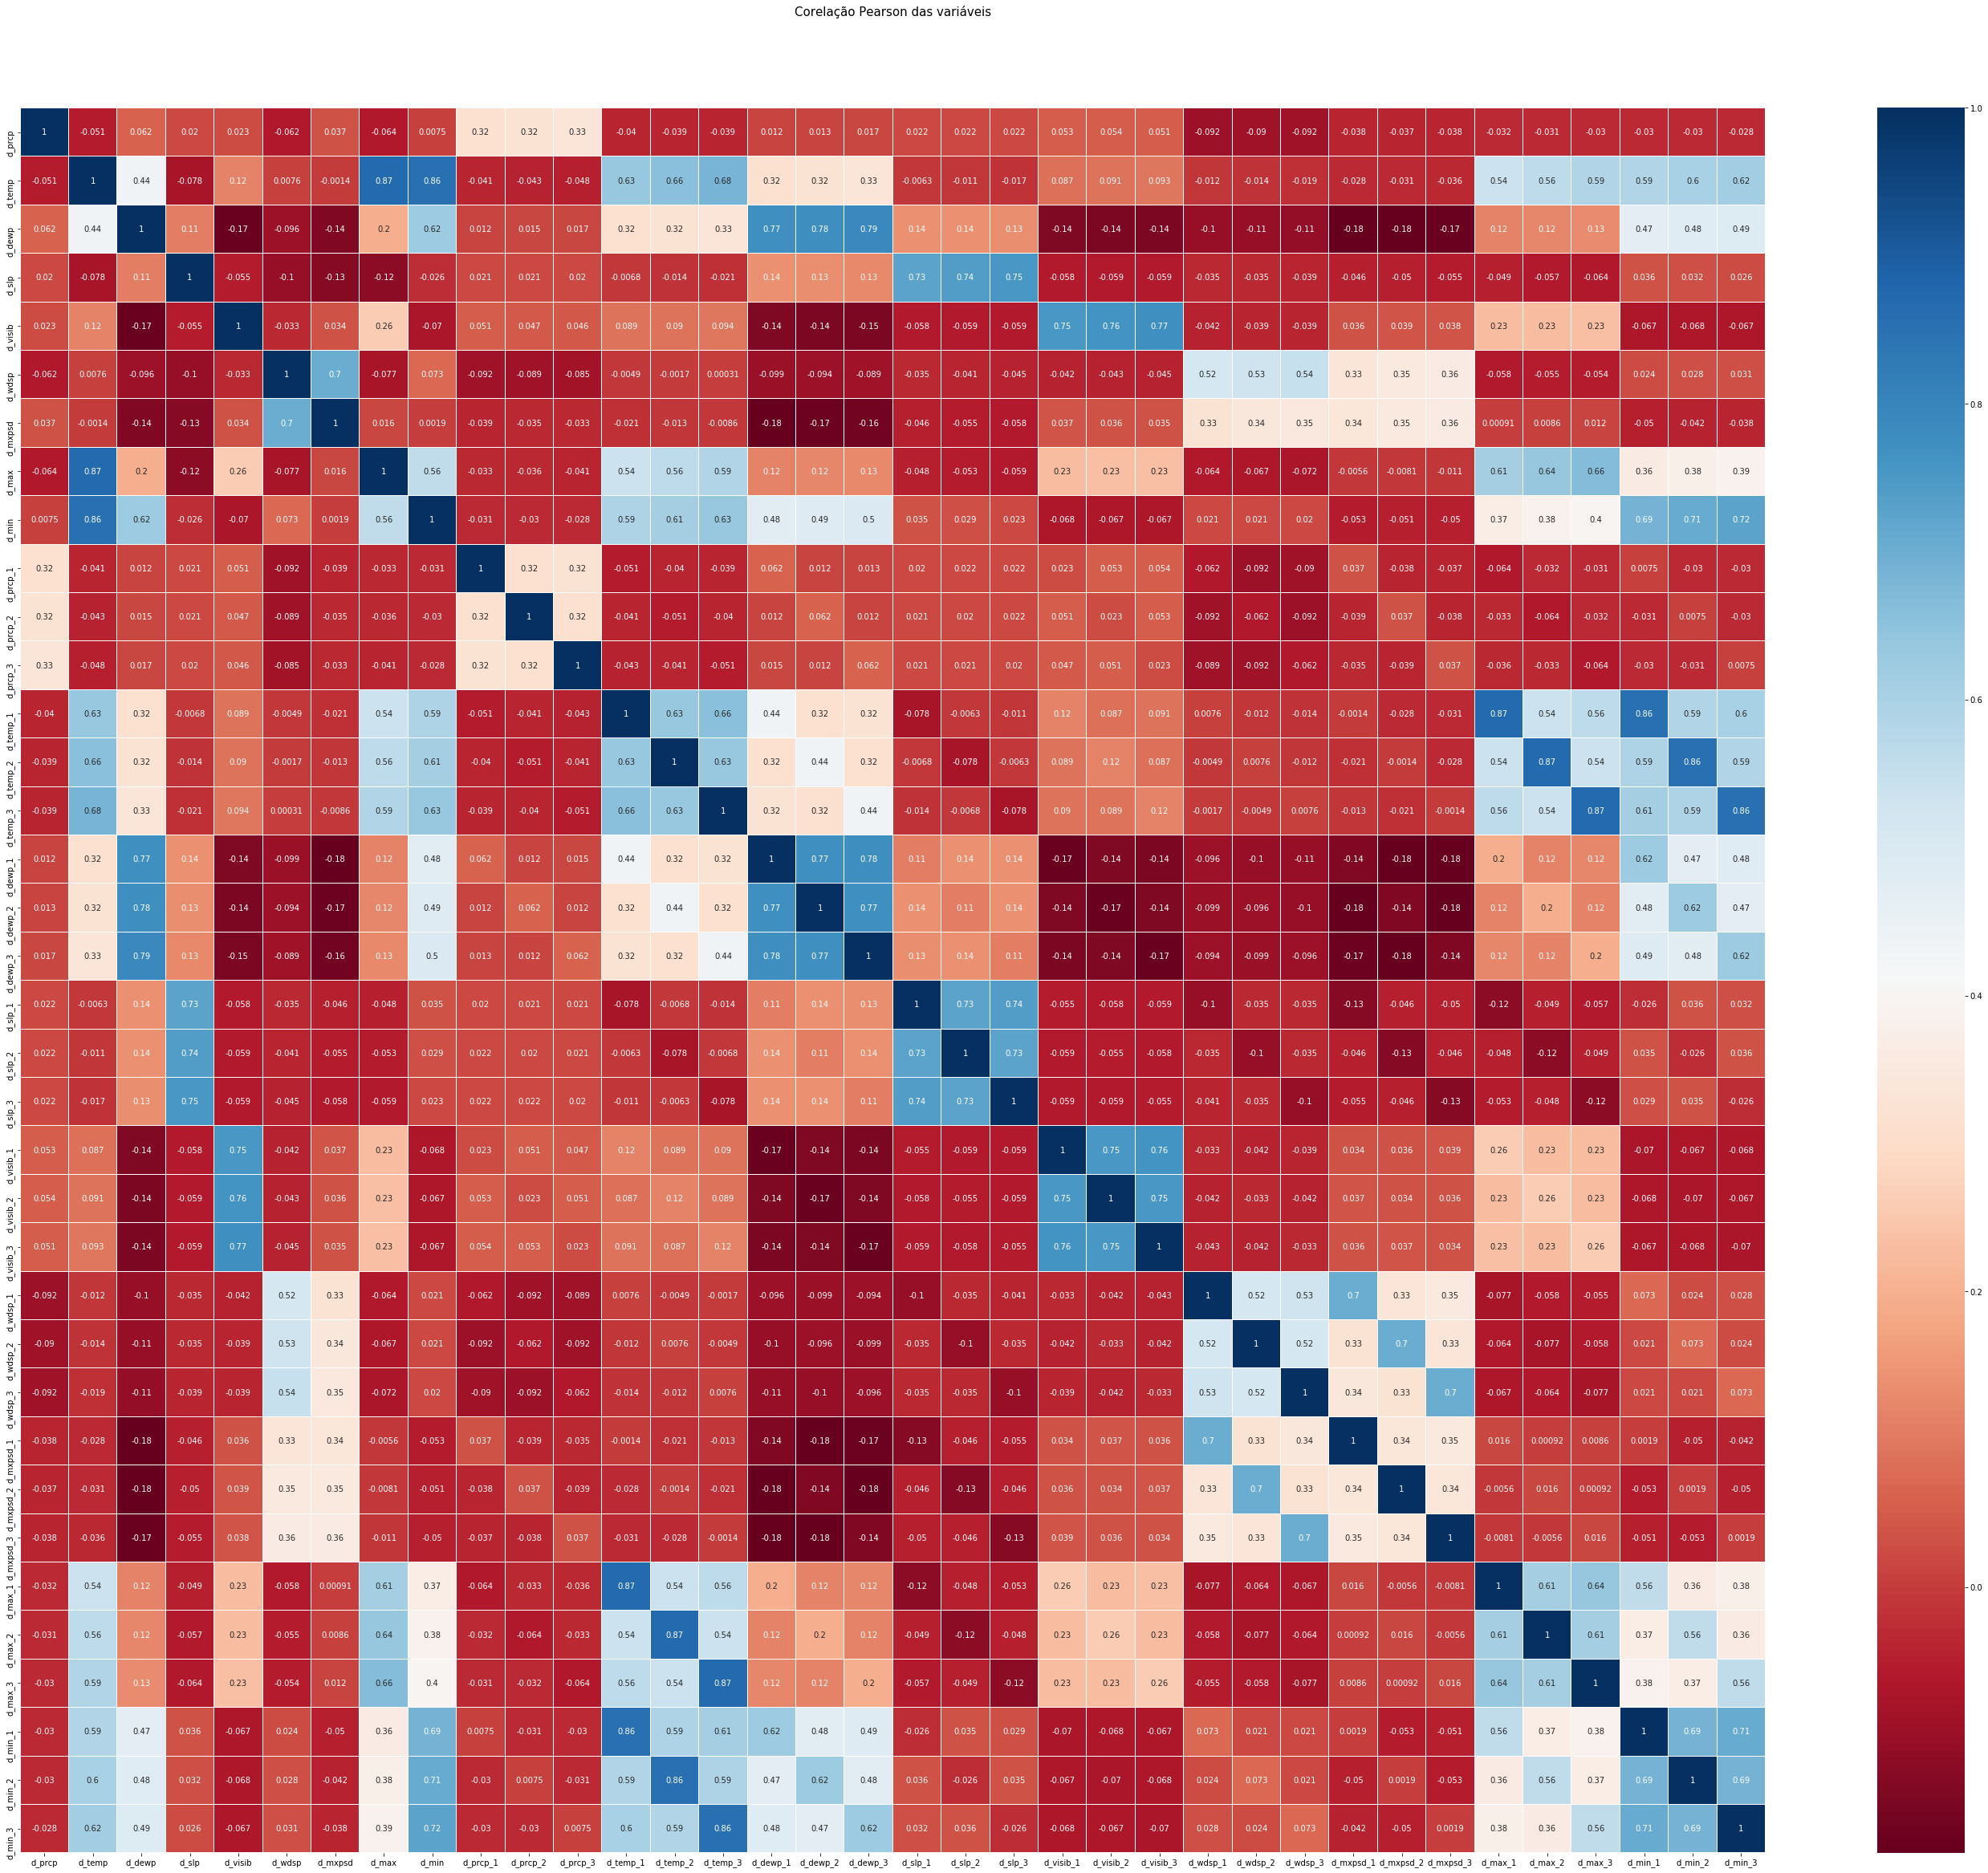

In [23]:
colormap = plt.cm.RdBu
plt.figure(figsize=(50,40))
plt.title(u'Corelação Pearson das variáveis', y=1.05, size=15)
svm = sns.heatmap(df_corl.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

fig = svm.get_figure()
name = 'pearson-all.png'
fig.savefig(name,dpi=300)

#df_corl.corr()[['d_prcp']].sort_values('d_prcp')  

<p>Nenhuma variável apresentou uma correlação alta. Assim vamos aplicar um modelo não linear.</p>

In [24]:
for v in df_corl.columns:
  if '_1' in v:  
    df_corl = df_corl.drop(v, axis = 1)
  if '_2' in v:  
    df_corl = df_corl.drop(v, axis = 1)
  if '_3' in v:  
    df_corl = df_corl.drop(v, axis = 1)
    
    
for v in df_corl.columns:
  if v in FLAGS:
    df_corl = df_corl.drop(v, axis = 1)

df_corl[:10]

,d_prcp,d_temp,d_dewp,d_slp,d_visib,d_wdsp,d_mxpsd,d_max,d_min
0,0.0,86.2,60.3,1010.8,10.0,7.9,15.0,105.1,78.1
1,0.0,89.8,51.8,1012.2,9.8,6.3,14.0,102.0,72.0
2,0.0,83.6,29.6,1009.6,10.0,8.8,19.0,100.0,66.0
3,0.0,85.7,61.1,1012.3,10.0,4.1,14.0,100.9,72.0
4,0.0,90.5,46.7,1010.1,10.0,5.5,12.0,104.0,75.9
5,0.0,79.1,28.7,1010.9,10.0,8.5,19.0,96.1,64.0
6,0.0,78.7,32.8,1008.4,10.0,7.1,13.0,93.9,64.0
7,0.0,91.3,41.2,1008.7,10.0,7.1,14.0,104.0,77.0
8,0.0,91.4,51.4,1010.1,10.0,6.6,14.0,102.0,72.0
9,0.0,89.1,30.3,1009.9,10.0,6.7,15.0,105.1,73.0


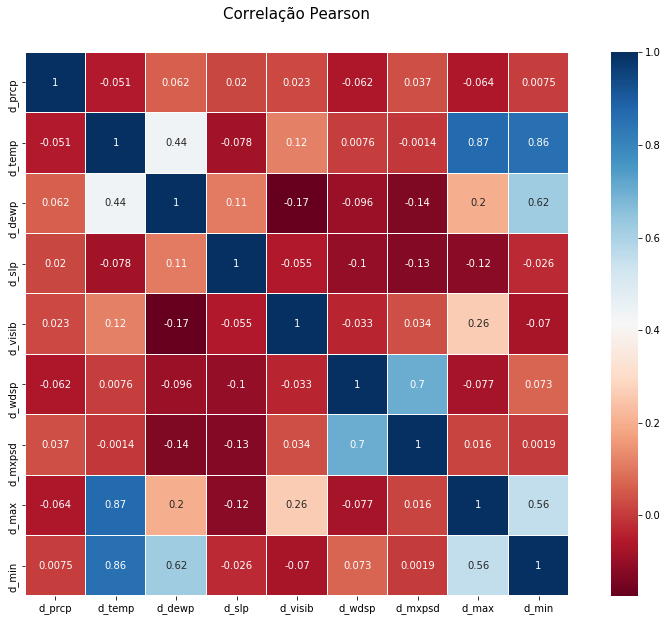

In [25]:
colormap = plt.cm.RdBu
plt.figure(figsize=(15,10))
plt.title(u'Correlação Pearson', y=1.05, size=15)
svm = sns.heatmap(df_corl.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

fig = svm.get_figure()
name = 'pearson-base.png'
fig.savefig(name,dpi=300)

<h2 style="color:blue;">Treinamento e validação</h2>

In [26]:
df_intptd[:10]

,d_prcp,d_stn,ws_lat,ws_lon,d_da,d_mo,d_year,d_temp,d_dewp,d_slp,...,d_snow_ice_pellets_3,d_hail_1,d_hail_2,d_hail_3,d_thunder_1,d_thunder_2,d_thunder_3,d_tornado_funnel_cloud_1,d_tornado_funnel_cloud_2,d_tornado_funnel_cloud_3
0,0.0,690150,34.3,-116.167,1,7,2015,86.2,60.3,1010.8,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
1,0.0,690150,34.3,-116.167,1,8,2015,89.8,51.8,1012.2,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
2,0.0,690150,34.3,-116.167,1,6,2015,83.6,29.6,1009.6,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.0,690150,34.3,-116.167,2,7,2015,85.7,61.1,1012.3,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,690150,34.3,-116.167,2,8,2015,90.5,46.7,1010.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,690150,34.3,-116.167,2,6,2015,79.1,28.7,1010.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,690150,34.3,-116.167,3,6,2015,78.7,32.8,1008.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,690150,34.3,-116.167,3,8,2015,91.3,41.2,1008.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,690150,34.3,-116.167,3,7,2015,91.4,51.4,1010.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,690150,34.3,-116.167,4,8,2015,89.1,30.3,1009.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
TRAIN_SIZE = int(0.7*len(df_intptd))
df_train = df_intptd[:TRAIN_SIZE]
df_valid = df_intptd[TRAIN_SIZE:]

In [28]:
print len(df_valid)
print len(df_train)

66764
155781


In [29]:
#removendo colunas inuteis para o modelo
for v in df_intptd.columns:
  if v in ['d_da','d_mo']:
    df_intptd = df_intptd.drop(v, axis = 1)

In [30]:
import tensorflow as tf
import shutil

print tf.__version__
tf.logging.set_verbosity(tf.logging.DEBUG)

1.4.1


In [31]:
#variavel a ser prevista
TARGET = u'd_prcp'
cols = list(df_intptd)
cols.remove(TARGET)
cols.insert(0, TARGET)
df_intptd[:10]

,d_prcp,d_stn,ws_lat,ws_lon,d_year,d_temp,d_dewp,d_slp,d_visib,d_wdsp,...,d_snow_ice_pellets_3,d_hail_1,d_hail_2,d_hail_3,d_thunder_1,d_thunder_2,d_thunder_3,d_tornado_funnel_cloud_1,d_tornado_funnel_cloud_2,d_tornado_funnel_cloud_3
0,0.0,690150,34.3,-116.167,2015,86.2,60.3,1010.8,10.0,7.9,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
1,0.0,690150,34.3,-116.167,2015,89.8,51.8,1012.2,9.8,6.3,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
2,0.0,690150,34.3,-116.167,2015,83.6,29.6,1009.6,10.0,8.8,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.0,690150,34.3,-116.167,2015,85.7,61.1,1012.3,10.0,4.1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,690150,34.3,-116.167,2015,90.5,46.7,1010.1,10.0,5.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,690150,34.3,-116.167,2015,79.1,28.7,1010.9,10.0,8.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,690150,34.3,-116.167,2015,78.7,32.8,1008.4,10.0,7.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,690150,34.3,-116.167,2015,91.3,41.2,1008.7,10.0,7.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,690150,34.3,-116.167,2015,91.4,51.4,1010.1,10.0,6.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,690150,34.3,-116.167,2015,89.1,30.3,1009.9,10.0,6.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
FEATURES = df_intptd.columns.tolist()
print FEATURES

['d_prcp', 'd_stn', 'ws_lat', 'ws_lon', 'd_year', 'd_temp', 'd_dewp', 'd_slp', 'd_visib', 'd_wdsp', 'd_mxpsd', 'd_max', 'd_min', 'd_fog', 'd_rain_drizzle', 'd_snow_ice_pellets', 'd_hail', 'd_thunder', 'd_tornado_funnel_cloud', 'd_prcp_1', 'd_prcp_2', 'd_prcp_3', 'd_temp_1', 'd_temp_2', 'd_temp_3', 'd_dewp_1', 'd_dewp_2', 'd_dewp_3', 'd_slp_1', 'd_slp_2', 'd_slp_3', 'd_visib_1', 'd_visib_2', 'd_visib_3', 'd_wdsp_1', 'd_wdsp_2', 'd_wdsp_3', 'd_mxpsd_1', 'd_mxpsd_2', 'd_mxpsd_3', 'd_max_1', 'd_max_2', 'd_max_3', 'd_min_1', 'd_min_2', 'd_min_3', 'd_fog_1', 'd_fog_2', 'd_fog_3', 'd_rain_drizzle_1', 'd_rain_drizzle_2', 'd_rain_drizzle_3', 'd_snow_ice_pellets_1', 'd_snow_ice_pellets_2', 'd_snow_ice_pellets_3', 'd_hail_1', 'd_hail_2', 'd_hail_3', 'd_thunder_1', 'd_thunder_2', 'd_thunder_3', 'd_tornado_funnel_cloud_1', 'd_tornado_funnel_cloud_2', 'd_tornado_funnel_cloud_3']


In [33]:
df_intptd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222545 entries, 0 to 222544
Data columns (total 64 columns):
d_prcp                      222545 non-null float64
d_stn                       222545 non-null int64
ws_lat                      222545 non-null float64
ws_lon                      222545 non-null float64
d_year                      222545 non-null int64
d_temp                      222545 non-null float64
d_dewp                      222545 non-null float64
d_slp                       222545 non-null float64
d_visib                     222545 non-null float64
d_wdsp                      222545 non-null float64
d_mxpsd                     222545 non-null float64
d_max                       222545 non-null float64
d_min                       222545 non-null float64
d_fog                       222545 non-null float64
d_rain_drizzle              222545 non-null float64
d_snow_ice_pellets          222545 non-null float64
d_hail                      222545 non-null float64
d_thunder

<h3 style="color:green;"> Deep Neural Network Regression </h3>

In [42]:
FLAGS = ['d_fog','d_rain_drizzle','d_snow_ice_pellets','d_hail','d_thunder', \
         'd_tornado_funnel_cloud','d_fog_1','d_rain_drizzle_1', \
         'd_snow_ice_pellets_1','d_hail_1','d_thunder_1','d_tornado_funnel_cloud_1', \
         'd_fog_2','d_rain_drizzle_2','d_snow_ice_pellets_2','d_hail_2','d_thunder_2', \
         'd_tornado_funnel_cloud_2','d_fog_3','d_rain_drizzle_3','d_snow_ice_pellets_3',\
         'd_hail_3','d_thunder_3','d_tornado_funnel_cloud_3'
        ]

#'d_stn', 
FEATURES = ['d_prcp','ws_lat', 'ws_lon', 'd_year', 'd_temp', 'd_dewp', \
           'd_slp', 'd_visib', 'd_wdsp', 'd_mxpsd', 'd_max', 'd_min', \
           'd_fog', 'd_rain_drizzle', 'd_snow_ice_pellets', 'd_hail', \
           'd_thunder', 'd_tornado_funnel_cloud', 'd_prcp_1', 'd_prcp_2',\
           'd_prcp_3', 'd_temp_1', 'd_temp_2', 'd_temp_3', 'd_dewp_1', \
           'd_dewp_2', 'd_dewp_3', 'd_slp_1', 'd_slp_2', 'd_slp_3', \
           'd_visib_1', 'd_visib_2', 'd_visib_3', 'd_wdsp_1', 'd_wdsp_2', \
           'd_wdsp_3', 'd_mxpsd_1', 'd_mxpsd_2', 'd_mxpsd_3', 'd_max_1', \
           'd_max_2', 'd_max_3', 'd_min_1', 'd_min_2', 'd_min_3', 'd_fog_1',
           'd_fog_2', 'd_fog_3', 'd_rain_drizzle_1', 'd_rain_drizzle_2', \
           'd_rain_drizzle_3', 'd_snow_ice_pellets_1', 'd_snow_ice_pellets_2',\
           'd_snow_ice_pellets_3', 'd_hail_1', 'd_hail_2', 'd_hail_3', \
           'd_thunder_1', 'd_thunder_2', 'd_thunder_3', 'd_tornado_funnel_cloud_1',\
           'd_tornado_funnel_cloud_2', 'd_tornado_funnel_cloud_3'            
]   

DF = df_train # Uggly

def create_dic(df):
    useful_features = {}
    EXCEPTION =  ['d_year']
    for f in FEATURES:            
        if f not in (FLAGS + EXCEPTION):                        
            useful_features[f] = tf.constant(np.array(df[f].values, dtype=np.float32))
        else:
            df[f] = df[f].astype(int)            
            useful_features[f] = tf.constant(df[f].values)
    labels = df['d_prcp'].values
    return useful_features, labels

def make_input_fn_train(): 
    features, labels = create_dic(df_train)
    return features, tf.reshape(labels, [-1, 1])   

def make_input_fn_test():
    features, labels = create_dic(df_valid)
    return features, tf.reshape(labels, [-1, 1])    
    
def make_model(features, labels, mode, params, config):
    
    feature_columns = make_feature_cols()
    
    # Creates the input layer starting from the feature definitions of above    
    input_layer = tf.feature_column.input_layer(
        features=features,
        feature_columns=feature_columns
    )
    
    # Get the global step
    global_step = tf.contrib.framework.get_or_create_global_step()
    
    # First dense layer or the neural net
    x = tf.layers.dense(
        inputs=input_layer,
        units=512,
        activation=tf.nn.relu,
        name="fisrt_fully_connected_layer"
    )    
    
    # Adding dropout to lessen chances of overfitting
    x = tf.layers.dropout(
        inputs=x,
        name="first_dropout"
    )    
    
    # Second dense layer
    x = tf.layers.dense(
        inputs=x,
        units=128,
        activation=tf.nn.relu,
        name="second_fully_connected_layer"
    )       
    
    # Third and final deep layer of the neural net
    x = tf.layers.dense(
        inputs=x,
        units=16,
        activation=tf.nn.relu,
        name="third_fully_connected_layer"
    )    
    
    # Linear output neuron that combine the output of the neural net
    predictions = tf.contrib.layers.fully_connected(
        inputs=x,
        num_outputs=1
    )
    
    # Loss is defined as the L1 distance since it is less sensitive to outliers
    loss = tf.losses.absolute_difference(
        labels=labels,
        predictions=predictions
    )    
    
    # Export the loss to tensorboard
    tf.summary.scalar("Loss", loss)   
    
    # Using ADAgrad Momentum Optimizer since it provides quite some advance features and
    # turns out to be very stable
    optimizer = tf.train.AdamOptimizer(
        learning_rate=params.learning_rate,
    )
    
    # Out train op in the tensorflow graph. Computing this also increases our global_step
    train_op = optimizer.minimize(loss, global_step=global_step)    
    
    # Finally, wrap the tensor defined above in the format Tensorflow expects
    return tf.estimator.EstimatorSpec(
        mode=mode,
        predictions=predictions,
        loss=loss,
        train_op=train_op
    )    
    
def make_feature_cols():
   
    nbuckets = range(1985,1986)        
    year_bucket_column = tf.feature_column.bucketized_column(
                                tf.feature_column.numeric_column("d_year"),
                                nbuckets)

    # Distance USA between lat: 25.0 to 48.0 is ~2550 km / 50 km = 50
    latbuckets_n = 50 
    latbuckets = np.linspace(25.0, 48.0, latbuckets_n).tolist()
    latitude_bucket_column = tf.feature_column.bucketized_column(
                            tf.feature_column.numeric_column('ws_lat'),
                            latbuckets)    

    # Distance USA between lon: -124.0 to -65.0 is ~7500 kms / 50 km = 150    
    lonbuckets_n = 150    
    lonbuckets = np.linspace(-124.0, -65.0, lonbuckets_n).tolist()
    longitude_bucket_column = tf.feature_column.bucketized_column(
                            tf.feature_column.numeric_column('ws_lon'),
                            lonbuckets)

    # Create an embedding column of the cross feature of binned latitude and binned longitude
    lat_x_long = tf.feature_column.embedding_column(
        tf.feature_column.crossed_column(
            keys=[latitude_bucket_column, longitude_bucket_column],
            hash_bucket_size=(latbuckets_n * lonbuckets_n)
        ),
        dimension=50
    )
    
    feature_columns = {year_bucket_column, lat_x_long}
    
    
    for f in FEATURES:        
        if f not in (['d_stn', 'ws_lat', 'ws_lon', 'd_year'] + FLAGS + [TARGET]):            
            feature_columns.add(tf.feature_column.numeric_column(f))
            
    for f in FLAGS:
        categorical = tf.feature_column.embedding_column(
                        tf.feature_column.categorical_column_with_identity(f, 2),2)
        
        feature_columns.add(categorical)
        
    #print len(feature_columns)
    
    return feature_columns    

<h3 style="color:blue;">Treinando o modelo</h3>

In [35]:
input_fn = make_input_fn_train

hparams = tf.contrib.training.HParams(
    learning_rate=.1,
)    

config = tf.ConfigProto(
    # allow_soft_placement=True,
    # log_device_placement=True
)    

trainingConfig = tf.contrib.learn.RunConfig(        
    save_summary_steps=500,
    save_checkpoints_steps=500,
    model_dir=("/tmp/tf-logs/EST-2"),
    session_config=config
)    

estimator = tf.estimator.Estimator(
    model_fn=make_model,
    params=hparams,
    config=trainingConfig
)

               

INFO:tensorflow:Using config: {'_model_dir': '/tmp/tf-logs/EST-2', '_save_checkpoints_secs': None, '_num_ps_replicas': 0, '_keep_checkpoint_max': 5, '_session_config': , '_tf_random_seed': None, '_task_type': None, '_environment': 'local', '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fa8b4e5cfd0>, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_num_worker_replicas': 0, '_task_id': 0, '_save_summary_steps': 500, '_save_checkpoints_steps': 500, '_evaluation_master': '', '_keep_checkpoint_every_n_hours': 10000, '_master': '', '_log_step_count_steps': 100}


In [41]:
input_fn = make_input_fn_train()
print input_fn

({'d_slp': <tf.Tensor 'Const_6:0' shape=(155781,) dtype=float32>, 'd_thunder_1': <tf.Tensor 'Const_57:0' shape=(155781,) dtype=int64>, 'd_thunder_3': <tf.Tensor 'Const_59:0' shape=(155781,) dtype=int64>, 'd_thunder_2': <tf.Tensor 'Const_58:0' shape=(155781,) dtype=int64>, 'd_tornado_funnel_cloud': <tf.Tensor 'Const_17:0' shape=(155781,) dtype=int64>, 'd_max': <tf.Tensor 'Const_10:0' shape=(155781,) dtype=float32>, 'd_visib_1': <tf.Tensor 'Const_30:0' shape=(155781,) dtype=float32>, 'd_tornado_funnel_cloud_3': <tf.Tensor 'Const_62:0' shape=(155781,) dtype=int64>, 'd_wdsp_2': <tf.Tensor 'Const_34:0' shape=(155781,) dtype=float32>, 'd_slp_1': <tf.Tensor 'Const_27:0' shape=(155781,) dtype=float32>, 'd_slp_2': <tf.Tensor 'Const_28:0' shape=(155781,) dtype=float32>, 'd_slp_3': <tf.Tensor 'Const_29:0' shape=(155781,) dtype=float32>, 'd_fog': <tf.Tensor 'Const_12:0' shape=(155781,) dtype=int64>, 'd_visib_3': <tf.Tensor 'Const_32:0' shape=(155781,) dtype=float32>, 'd_hail_2': <tf.Tensor 'Const_

In [ ]:
estimator.train(
    input_fn=input_fn,
    steps=100,
)    

<h3 style="color:blue;">Avaliando o modelo</h3>

In [43]:
accuracy_score = estimator.evaluate(input_fn=make_input_fn_test)["accuracy"]
print("\nTest Accuracy: {0:f}\n".format(accuracy_score))

DEBUG:tensorflow:Transforming feature_column _NumericColumn(key='d_dewp', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None).
DEBUG:tensorflow:Transforming feature_column _NumericColumn(key='d_dewp_1', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None).
DEBUG:tensorflow:Transforming feature_column _NumericColumn(key='d_dewp_2', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None).
DEBUG:tensorflow:Transforming feature_column _NumericColumn(key='d_dewp_3', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None).
DEBUG:tensorflow:Transforming feature_column _IdentityCategoricalColumn(key='d_fog_1', num_buckets=2, default_value=None).
DEBUG:tensorflow:Transforming feature_column _IdentityCategoricalColumn(key='d_fog_2', num_buckets=2, default_value=None).
DEBUG:tensorflow:Transforming feature_column _IdentityCategoricalColumn(key='d_fog_3', num_buckets=2, default_value=None).
DEBUG:tensorflow:Transforming feature_column 

DEBUG:tensorflow:Transforming feature_column _BucketizedColumn(source_column=_NumericColumn(key='d_year', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), boundaries=(1985,)).
DEBUG:tensorflow:Transforming feature_column _NumericColumn(key='d_year', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None).
DEBUG:tensorflow:Transforming feature_column _CrossedColumn(keys=(_BucketizedColumn(source_column=_NumericColumn(key='ws_lat', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), boundaries=(25.0, 25.46938775510204, 25.93877551020408, 26.408163265306122, 26.877551020408163, 27.346938775510203, 27.816326530612244, 28.285714285714285, 28.755102040816325, 29.224489795918366, 29.693877551020407, 30.163265306122447, 30.632653061224488, 31.10204081632653, 31.571428571428573, 32.04081632653061, 32.51020408163265, 32.97959183673469, 33.44897959183673, 33.91836734693878, 34.38775510204081, 34.85714285714286, 35.326530612244895, 35.79591836

DEBUG:tensorflow:Transforming feature_column _NumericColumn(key='ws_lon', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None).
INFO:tensorflow:Starting evaluation at 2018-01-23-12:55:21
INFO:tensorflow:Restoring parameters from /tmp/tf-logs/EST-2/model.ckpt-2000


KeyboardInterrupt: 

<h2 style="color:blue;">Conclusão</h2>

<p>Os resultados não foram bons, visto que são viciados, mas a proposta é rodar novamente mas desta vez aplicando validação cruzada. E refazer o holdout mas feito corretamente, ou seja, selecionar randomicamente. Aplicando redes neurais <b>(DNN Regressor) foi 24.66 </b></p>

<p>Os próximos passos são fazer o balanciamento, e possivelmente discretizar a chuva extrema em intervalos ao inves de prever a precipitação em valores contínuos. E selecionar as instâncias de forma randômica.</p>

